Why start with binary classification first?

1. Because we want to follow the motto of **"FAIL FAST, FAIL CHEAP"**.
If it fails at this experimental stage, at least we can divert our focus onto some other projects instead.
2. We want to test if the number of images of the training data and the test data is sufficient to train the model. If it works, we can expand further to more food choices (Scaling up)
 

In [ ]:
import zipfile
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(tf.__version__)

2.7.0


In [ ]:
## Get the data
!wget https://storage.googleapis.com/sgfood/SG_Laksa_satay.zip

#Unzip the download file
zip_ref = zipfile.ZipFile("SG_Laksa_satay.zip")
zip_ref.extractall()
zip_ref.close()

--2022-02-02 07:23:28--  https://storage.googleapis.com/sgfood/SG_Laksa_satay.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 66.102.1.128, 142.251.5.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45669738 (44M) [application/x-zip-compressed]
Saving to: ‘SG_Laksa_satay.zip’

SG_Laksa_satay.zip  100%[===================>]  43.55M  7.63MB/s    in 5.7s    

2022-02-02 07:23:35 (7.63 MB/s) - ‘SG_Laksa_satay.zip’ saved [45669738/45669738]



### **Inspect the data**

Visualizing the data is the key starting part to understand the data

In [ ]:
!ls SG_Laksa_satay 

test  train


There's 2 directories (test and train)

In [ ]:
!ls SG_Laksa_satay/train

laksa  satay


Inside the directories, there are another 2 sub-directories/folders (laksa and satay)

In [ ]:
!ls SG_Laksa_satay/train/laksa

laska_train0.jpg    laska_train26.jpg	laska_train439.jpg  laska_train608.jpg
laska_train100.jpg  laska_train270.jpg	laska_train43.jpg   laska_train609.jpg
laska_train101.jpg  laska_train271.jpg	laska_train440.jpg  laska_train60.jpg
laska_train102.jpg  laska_train272.jpg	laska_train441.jpg  laska_train610.jpg
laska_train103.jpg  laska_train273.jpg	laska_train442.jpg  laska_train611.jpg
laska_train104.jpg  laska_train274.jpg	laska_train443.jpg  laska_train612.jpg
laska_train105.jpg  laska_train275.jpg	laska_train444.jpg  laska_train613.jpg
laska_train106.jpg  laska_train276.jpg	laska_train445.jpg  laska_train614.jpg
laska_train107.jpg  laska_train277.jpg	laska_train446.jpg  laska_train615.jpg
laska_train108.jpg  laska_train278.jpg	laska_train447.jpg  laska_train616.jpg
laska_train109.jpg  laska_train279.jpg	laska_train448.jpg  laska_train617.jpg
laska_train10.jpg   laska_train27.jpg	laska_train449.jpg  laska_train618.jpg
laska_train110.jpg  laska_train280.jpg	laska_train44.jpg   laska_tr

These are the files are contained in sub-folder of train/laska alone

In [ ]:
#Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("SG_Laksa_satay"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}. ")

there are 2 directories and 0 images in SG_Laksa_satay. 
there are 2 directories and 0 images in SG_Laksa_satay/test. 
there are 0 directories and 250 images in SG_Laksa_satay/test/laksa. 
there are 0 directories and 250 images in SG_Laksa_satay/test/satay. 
there are 2 directories and 0 images in SG_Laksa_satay/train. 
there are 0 directories and 750 images in SG_Laksa_satay/train/laksa. 
there are 0 directories and 750 images in SG_Laksa_satay/train/satay. 


There's a total of 1500 train images (750 each) and a total of 500 test images (250 each) for this dataset 

In [ ]:
#Create the class names for each food type programmatically
data_dir = pathlib.Path("SG_Laksa_satay/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #Create a list of class_names from the subdirectories
print(class_names)

['laksa' 'satay']


### **View a random Steak image from training dataset**

In [ ]:
# View an image as a function

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['laska_train643.jpg']
Image shape: (600, 560, 3)


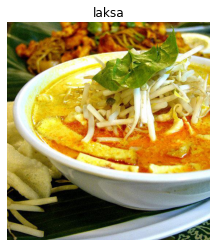

In [ ]:
# View a random image from the training dataset of laska
img = view_random_image(target_dir="SG_Laksa_satay/train/",
                        target_class="laksa")

['satay_train185.jpg']
Image shape: (225, 225, 3)


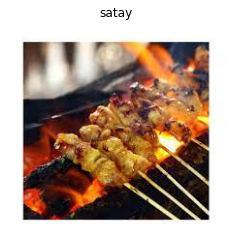

In [ ]:
# View a random image from the training dataset of satay
img = view_random_image(target_dir="SG_Laksa_satay/train/",
                        target_class="satay")

In [ ]:
# View the img 
img 

array([[[238, 238, 228],
        [238, 238, 228],
        [238, 238, 228],
        ...,
        [222, 229, 237],
        [222, 229, 237],
        [222, 229, 237]],

       [[238, 238, 228],
        [238, 238, 228],
        [238, 238, 228],
        ...,
        [222, 229, 237],
        [222, 229, 237],
        [222, 229, 237]],

       [[238, 238, 228],
        [238, 238, 228],
        [238, 238, 228],
        ...,
        [222, 229, 237],
        [222, 229, 237],
        [222, 229, 237]],

       ...,

       [[228, 216, 216],
        [233, 221, 221],
        [229, 217, 217],
        ...,
        [216, 218, 243],
        [216, 218, 243],
        [216, 218, 243]],

       [[228, 216, 216],
        [233, 221, 221],
        [229, 217, 217],
        ...,
        [216, 218, 239],
        [216, 218, 241],
        [216, 218, 241]],

       [[241, 229, 229],
        [228, 216, 216],
        [229, 217, 217],
        ...,
        [212, 215, 230],
        [212, 218, 234],
        [214, 219, 238]]

these are the arrays of the RGB that comprises the image

The values in the img array are between 0 and 255.
This is because that's the possible range for red, green and blue values.

For example, a pixel with a value red=0, green=0, blue=255 will look very blue.

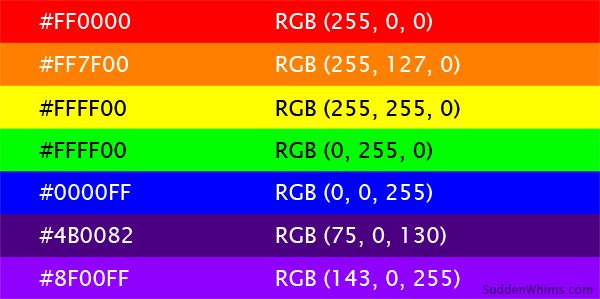

In [ ]:
#An example of how colour code look like
Image("https://github.com/DSstore/AIP/raw/main/RGB.jpg")

In [ ]:
# converting into into Tensor
tf.constant(img)

<tf.Tensor: shape=(185, 272, 3), dtype=uint8, numpy=
array([[[238, 238, 228],
        [238, 238, 228],
        [238, 238, 228],
        ...,
        [222, 229, 237],
        [222, 229, 237],
        [222, 229, 237]],

       [[238, 238, 228],
        [238, 238, 228],
        [238, 238, 228],
        ...,
        [222, 229, 237],
        [222, 229, 237],
        [222, 229, 237]],

       [[238, 238, 228],
        [238, 238, 228],
        [238, 238, 228],
        ...,
        [222, 229, 237],
        [222, 229, 237],
        [222, 229, 237]],

       ...,

       [[228, 216, 216],
        [233, 221, 221],
        [229, 217, 217],
        ...,
        [216, 218, 243],
        [216, 218, 243],
        [216, 218, 243]],

       [[228, 216, 216],
        [233, 221, 221],
        [229, 217, 217],
        ...,
        [216, 218, 239],
        [216, 218, 241],
        [216, 218, 241]],

       [[241, 229, 229],
        [228, 216, 216],
        [229, 217, 217],
        ...,
        [212, 215, 23

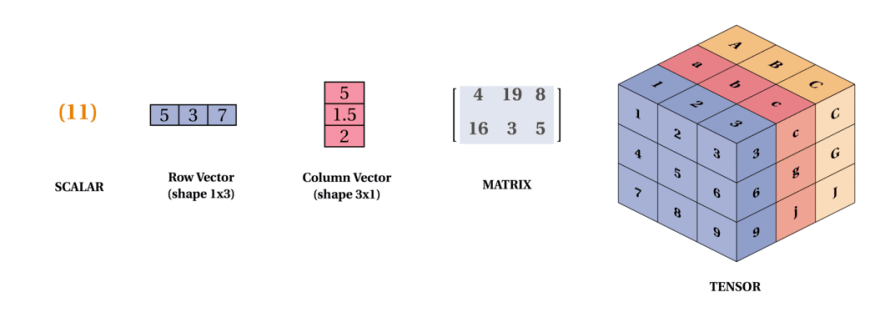

In [ ]:
Image("https://github.com/DSstore/AIP/raw/main/tensorflow%20matrix.png")

By passing these arrays to tf.constant, we transform and fitting the arrays into tensor format.

A tensor can be thought of as an n-dimensional matrix.
 
In the CNN, tensors will be 3-dimensional with the exception of the output layer.

In [ ]:
# View the image shape
img.shape 

(185, 272, 3)

(183, 275, 3) translate as 
* 183 in height, 
* 275 in width and 
* 3 colour channels

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always constant **3**


### **Normalization**

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.93333333, 0.93333333, 0.89411765],
        [0.93333333, 0.93333333, 0.89411765],
        [0.93333333, 0.93333333, 0.89411765],
        ...,
        [0.87058824, 0.89803922, 0.92941176],
        [0.87058824, 0.89803922, 0.92941176],
        [0.87058824, 0.89803922, 0.92941176]],

       [[0.93333333, 0.93333333, 0.89411765],
        [0.93333333, 0.93333333, 0.89411765],
        [0.93333333, 0.93333333, 0.89411765],
        ...,
        [0.87058824, 0.89803922, 0.92941176],
        [0.87058824, 0.89803922, 0.92941176],
        [0.87058824, 0.89803922, 0.92941176]],

       [[0.93333333, 0.93333333, 0.89411765],
        [0.93333333, 0.93333333, 0.89411765],
        [0.93333333, 0.93333333, 0.89411765],
        ...,
        [0.87058824, 0.89803922, 0.92941176],
        [0.87058824, 0.89803922, 0.92941176],
        [0.87058824, 0.89803922, 0.92941176]],

       ...,

       [[0.89411765, 0.84705882, 0.84705882],
        [0.91372549, 0.86666667, 0.86666667],
        [0.89803922, 0

Many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. 

Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

# ***Model 1 (BaseLine Model)***

Build a convolutional neural network to find patterns in our images, more specifically we need a way to:

1. Load our images
2. Preprocess our images
3. Build a CNN to find patterns in our images
4. Compile our CNN
5. Fit the CNN to our training data

In [ ]:
#Set the seed
tf.random.set_seed(42)

The seed is given an integer value to ensure that the results of pseudo-random generation are reproducible.

By re-using a seed value, the same sequence should be reproducible from run to run as long as multiple threads are not running.

In [ ]:
# Preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

This is to get all of the pixel values between 1 and 0, also called scaling/normalization)

In [ ]:
#Setup the train and test directories
train_dir = "SG_Laksa_satay/train/"
test_dir = "SG_Laksa_satay/test/"

In [ ]:
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="binary", 
                                               )

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


**flow_from_directory** - it takes the path to a directory and generates batches of augmented/normalized data.

**batch_size** - number of of images to process at a time and batch size 32 is very common in machine learning due to our limitation of current technology

**target_size** - Convert all images to height 244, width 244. Why 244?
It is a common image size for machine learning.

**class_mode** - The type of problem we're working on





In [ ]:
# Create a CNN model 
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])


**Sequential model** - It is a tensor flow deep learning library to create a deep learning model for both regression and classification problems. It allows us to create a deep learning model by adding layers to it.

**Conv2D** - Layers are also represented within the Keras deep learning framework. For two-dimensional inputs, such as images, they are represented by keras.layers.Conv2D

🔑**tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid',
    data_format=None, dilation_rate=(1, 1), groups=1, activation=None,
    use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)**

**Filters** - represents the number of filters that should be learnt by the convolutional layer aka the dimensionality of the output.

**Kernel size** - represents the number of pixels in height and width that should be summarized, i.e. the two-dimensional width and height of the filter.

**ReLU** - it is an activation function is specifically used as a non-linear activation function.CNNs are able to achieve such tremendous accuracies is because of their non-linearity. ReLU applies much-needed non-linearity into the model. Non-linearity is necessary to produce non-linear decision boundaries, so that the output cannot be written as a linear combination of the inputs. 

**MaxPool2D** - Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.

🔑**tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), strides=None, padding='valid', data_format=None,
    **kwargs
)**

**Flatten** - This layer converts a three-dimensional layer in the network into a one-dimensional vector to fit the input of a fully-connected layer for classification
For example, a 5x5x2 tensor would be converted into a vector of size 50

🔑**tf.keras.layers.Flatten(
    data_format=None, **kwargs
)**

**Dense** - Just your regular fully-connected neural network layer.

🔑**tf.keras.layers.Dense(
    units, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)**

**Sigmoid** - Non-linear function since we are dealing with binary classification here


In [ ]:
# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

**binary_crossentropy** - Computes the binary crossentropy loss.

🔑**tf.keras.metrics.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)**

**Adam** - Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.


In [ ]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 180ms/step - loss: 0.6561 - accuracy: 0.6207 - val_loss: 0.5813 - val_accuracy: 0.6800
Epoch 2/5
47/47 [==============================] - 7s 158ms/step - loss: 0.4834 - accuracy: 0.7780 - val_loss: 0.5622 - val_accuracy: 0.7060
Epoch 3/5
47/47 [==============================] - 7s 159ms/step - loss: 0.4204 - accuracy: 0.8053 - val_loss: 0.5517 - val_accuracy: 0.7320
Epoch 4/5
47/47 [==============================] - 7s 159ms/step - loss: 0.3663 - accuracy: 0.8413 - val_loss: 0.6976 - val_accuracy: 0.6780
Epoch 5/5
47/47 [==============================] - 7s 159ms/step - loss: 0.3037 - accuracy: 0.8773 - val_loss: 0.5088 - val_accuracy: 0.7600




🔑**fit(
    x=None, y=None, batch_size=None, epochs=1, verbose='auto',
    callbacks=None, validation_split=0.0, validation_data=None, shuffle=True,
    class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None,
    validation_steps=None, validation_batch_size=None, validation_freq=1,
    max_queue_size=10, workers=1, use_multiprocessing=False
)**

**epochs** - Integer. Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided (unless the steps_per_epoch flag is set to something other than None)

**Steps_per_epoch** - Integer or None. Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch.

**validation_data** - Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data. 



# **Results from running without any GPU in runtime type**

Epoch 1/5
47/47 [==============================] - 89s 2s/step - loss: 0.6302 - accuracy: 0.6413 - val_loss: 0.5786 - val_accuracy: 0.7120
Epoch 2/5
47/47 [==============================] - 89s 2s/step - loss: 0.4771 - accuracy: 0.7853 - val_loss: 0.5550 - val_accuracy: 0.7200
Epoch 3/5
47/47 [==============================] - 88s 2s/step - loss: 0.4427 - accuracy: 0.8060 - val_loss: 0.5197 - val_accuracy: 0.7400
Epoch 4/5
47/47 [==============================] - 88s 2s/step - loss: 0.3575 - accuracy: 0.8393 - val_loss: 0.4928 - val_accuracy: 0.7480
Epoch 5/5
47/47 [==============================] - 89s 2s/step - loss: 0.2808 - accuracy: 0.8820 - val_loss: 0.5355 - val_accuracy: 0.7520

# **Results from running GPU in runtime type**


Epoch 1/5
47/47 [==============================] - 21s 140ms/step - loss: 0.6351 - accuracy: 0.6533 - val_loss: 0.5861 - val_accuracy: 0.6940

Epoch 2/5
47/47 [==============================] - 6s 125ms/step - loss: 0.4543 - accuracy: 0.7947 - val_loss: 0.5163 - val_accuracy: 0.7540

Epoch 3/5
47/47 [==============================] - 6s 127ms/step - loss: 0.3528 - accuracy: 0.8400 - val_loss: 0.5498 - val_accuracy: 0.7300

Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.3014 - accuracy: 0.8640 - val_loss: 0.5087 - val_accuracy: 0.7720

Epoch 5/5
47/47 [==============================] - 6s 125ms/step - loss: 0.2327 - accuracy: 0.8993 - val_loss: 0.5025 - val_accuracy: 0.774



Note that it only took less than 1 min to fit the model with GPU assigned whereas it took nearly 8 times longer when running without GPU assigned

In [ ]:
!nvidia-smi

Wed Feb  2 07:24:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0   110W / 149W |   1304MiB / 11441MiB |     22%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
len(train_data)

47

Why length of train_data is 47?
It is because of our batch size is 32

In [ ]:
1500/32 

46.875

Our total number of train images is 1500 and 32 is the batch size. 

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Note that for every MaxPooling layer, it halves the output shape 

In [ ]:
53 * 53 * 10

28090

Note that for Flatten layer, it "flatten" the tensor of shape ( ,53,53,10) into 1 vector of ( ,28090)

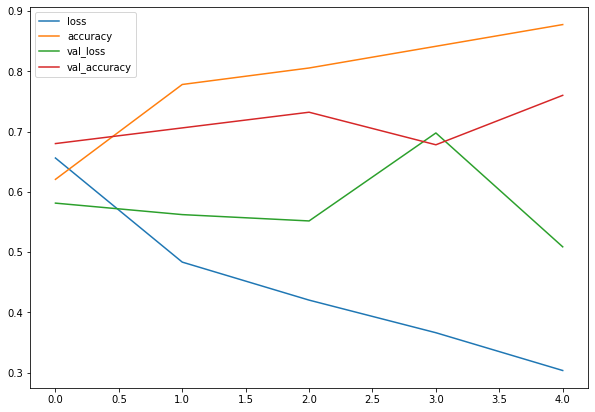

In [ ]:
#Viewing as plot graph
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

This plot is too hard to tell what is going on

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

Writing a function in order to reuse everytime when we need it

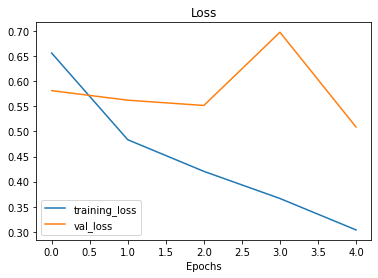

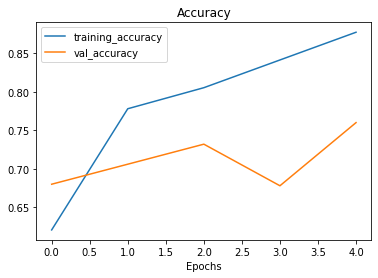

In [ ]:
#Checking the loss curves for model 1 with the function I just created
plot_loss_curves(history_1)

Judging by our loss curves, it looks like our model is overfitting the training dataset.

Note: When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished

### ***Model 2***

***Improving our baseline model 1 through hyperparameter tuning***

A baseline is a relatively simple model or existing result that you setup when beginnging a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on the data and then introduce complexity as required (Fail Fast, Fail cheap)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_2 = Sequential([
  Conv2D(filters=10,  #filter is the number of sliding windows(feature extractor) going acorss an input (higher = more complex model)
         kernel_size=3, # the size of the sliding windows going across the input (The smaller the kernel, the more fine-grained features it will extract.)
         strides=1, #the size of the step the sliding window takes across an input
         padding='valid', #if "same", output shape is same as input shape, if "valid", output shape gets compressed
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'), #10 is filter, 3 is kernel_size
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

For this current model, we will remove the MaxPooling layer for the moment and introduce strides and padding.

> 🔑 **Note** A feature can be considered as any significant part of an image. It's important to note that these features are not defined by us, instead, the model learns them as it applies different filters across the image.

In [ ]:
# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

> 🔑 **Note**

binary classification problem - loss function:'binary_crossentropy'

mutliclass classification problem - loss function:'categorical_crossentropy'

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 176ms/step - loss: 2.0926 - accuracy: 0.5073 - val_loss: 0.6537 - val_accuracy: 0.5900
Epoch 2/5
47/47 [==============================] - 8s 168ms/step - loss: 0.5341 - accuracy: 0.7193 - val_loss: 0.6107 - val_accuracy: 0.6800
Epoch 3/5
47/47 [==============================] - 8s 167ms/step - loss: 0.3126 - accuracy: 0.8680 - val_loss: 0.7765 - val_accuracy: 0.6240
Epoch 4/5
47/47 [==============================] - 8s 168ms/step - loss: 0.1837 - accuracy: 0.9400 - val_loss: 0.8067 - val_accuracy: 0.7120
Epoch 5/5
47/47 [==============================] - 8s 171ms/step - loss: 0.0657 - accuracy: 0.9807 - val_loss: 1.0358 - val_accuracy: 0.6960


**steps_per_epoch** - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)

**validation_steps** - same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

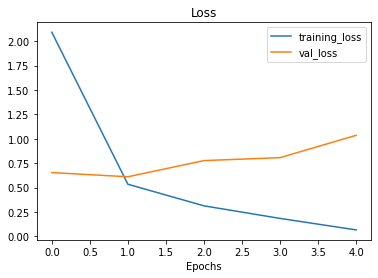

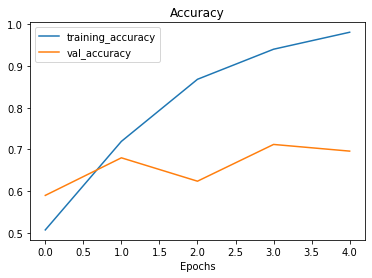

In [ ]:
# Plot the loss curves
plot_loss_curves(history_2)

A curve for validation accuracy and loss is seen in model_2 which can be said it is performing more uniformly and it is more desired than model_1,whereas model_1 is a zip-zap value. However, the curves are still not doing well as it is still overfitting.

model_1.evalute(test_data)

In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 74ms/step - loss: 0.5088 - accuracy: 0.7600


[0.5087884068489075, 0.7599999904632568]

In [ ]:
model_2.evaluate(test_data)

16/16 [==============================] - 1s 77ms/step - loss: 1.0358 - accuracy: 0.6960


[1.035781979560852, 0.6959999799728394]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


> 🔑**Note** the number of trainable params in model_2 has a total of 477,341 whereas model_1 has a total of 31,101 trainable params. In ML, the lesser the params you need to train to get the desirable result, the better the model.

Model 1 - 
16/16 [==============================] - 1s 59ms/step - loss: 0.7157 - accuracy: 0.7080
[0.7157126665115356, 0.7080000042915344]

Model 2 - 
16/16 [==============================] - 1s 61ms/step - loss: 0.8702 - accuracy: 0.7440
[0.8701844215393066, 0.7440000176429749]

Our accuracy has improved for 3.6% but the loss function has gone up by 16% which is not a good trade-off



Ways to induce overfitting
* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

Reduce overfitting
* Add data augmentation
* Add regularization model(such as Max2D pool)
* Add more data...

** Note** Reducing overfitting also means regularization

# ***Model 3***

Adding in more Conv2D layer and MaxPool2D layers

In [ ]:
# Create the model  (a 3 layer Convolutional Neural Network)
model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

This time we will use a 3 layer for this model to test

In [ ]:
# Compile model
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 155ms/step - loss: 0.6464 - accuracy: 0.6273 - val_loss: 0.5986 - val_accuracy: 0.6900
Epoch 2/5
47/47 [==============================] - 7s 146ms/step - loss: 0.5050 - accuracy: 0.7533 - val_loss: 0.5327 - val_accuracy: 0.7420
Epoch 3/5
47/47 [==============================] - 7s 145ms/step - loss: 0.4321 - accuracy: 0.7993 - val_loss: 0.4945 - val_accuracy: 0.7640
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.3780 - accuracy: 0.8233 - val_loss: 0.4979 - val_accuracy: 0.7700
Epoch 5/5
47/47 [==============================] - 7s 146ms/step - loss: 0.3428 - accuracy: 0.8427 - val_loss: 0.4767 - val_accuracy: 0.7920


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

> 🔑**Note** the number of trainable params in model_2 has a total of 477,341 whereas model_3 has a total of 8,861 trainable params. 

And it produces a significant better result in val_loss and val_accuracy. Hence this is the best model so far.

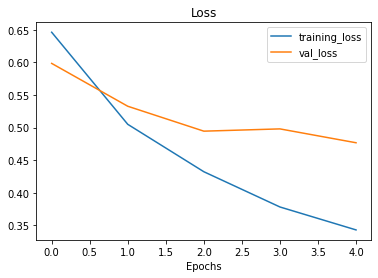

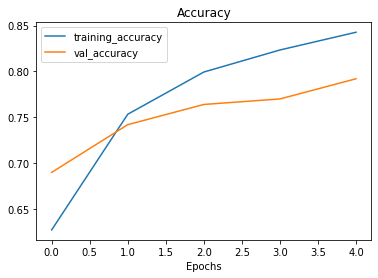

In [ ]:
# Plot the loss curves
plot_loss_curves(history_3)

> 🔑**Note** Our val_loss and val_accuracy is behaving what we want until it reaches point of 1.0 epoch

## **Model 4**

We will try with **data augmentation** with this model

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=40, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

Note: Data augmentation is usually only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)

#Regenerating image to show effects of data augmentation
train_image_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) #For demo the picture augmentation effect 
                                                                   
# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True) 

#Regenerating image to show effects of data augmentation
train_image = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) #For demo the picture augmentation effect

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

# Get image batch samples
original_images, original_labels = train_image.next()
augmented_original_images, augmented_original_labels = train_image_augmented.next()

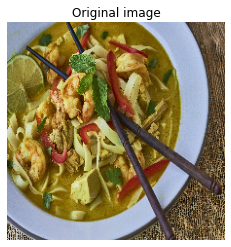

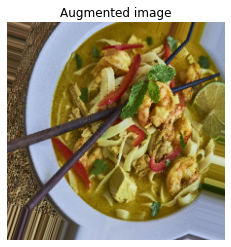

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(original_images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_original_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

> 🔑**Note** Data augmentation is a way to try and prevent a model from overfitting. 

In [ ]:
# Create the model
model_4 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 483ms/step - loss: 0.6555 - accuracy: 0.6113 - val_loss: 0.5875 - val_accuracy: 0.6940
Epoch 2/5
47/47 [==============================] - 22s 479ms/step - loss: 0.5537 - accuracy: 0.7267 - val_loss: 0.5017 - val_accuracy: 0.7460
Epoch 3/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4897 - accuracy: 0.7613 - val_loss: 0.4733 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 23s 499ms/step - loss: 0.4393 - accuracy: 0.7940 - val_loss: 0.4827 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 23s 480ms/step - loss: 0.4333 - accuracy: 0.8000 - val_loss: 0.4695 - val_accuracy: 0.7580


In [ ]:
model_3.evaluate(test_data)

16/16 [==============================] - 1s 70ms/step - loss: 0.4767 - accuracy: 0.7920


[0.4766591191291809, 0.7919999957084656]

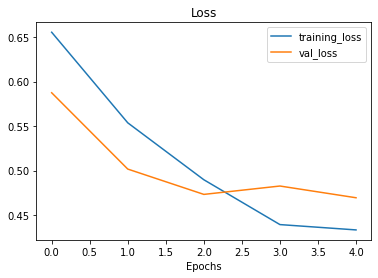

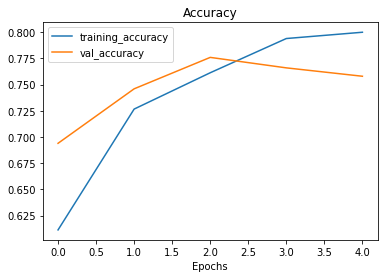

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_4)

statistics wise, there is not much difference.
However, when comparing the graph, model_4's val_loss and val_accuracy is heading to the right direction in where we want

# ***Model 5***

Increasing number to 32 per layer and increase epoch to 10

In [ ]:
# Create the model
model_5 = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(), # reduce number of features by half
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data_augmented, # changed to augmented training data
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 24s 500ms/step - loss: 0.6872 - accuracy: 0.5200 - val_loss: 0.6331 - val_accuracy: 0.6960
Epoch 2/10
47/47 [==============================] - 24s 519ms/step - loss: 0.5891 - accuracy: 0.6893 - val_loss: 0.5854 - val_accuracy: 0.6860
Epoch 3/10
47/47 [==============================] - 24s 501ms/step - loss: 0.5594 - accuracy: 0.7160 - val_loss: 0.5909 - val_accuracy: 0.6780
Epoch 4/10
47/47 [==============================] - 24s 520ms/step - loss: 0.4964 - accuracy: 0.7627 - val_loss: 0.5017 - val_accuracy: 0.7640
Epoch 5/10
47/47 [==============================] - 23s 481ms/step - loss: 0.4277 - accuracy: 0.8020 - val_loss: 0.4441 - val_accuracy: 0.7660
Epoch 6/10
47/47 [==============================] - 23s 487ms/step - loss: 0.3856 - accuracy: 0.8347 - val_loss: 0.3925 - val_accuracy: 0.8220
Epoch 7/10
47/47 [==============================] - 23s 483ms/step - loss: 0.3403 - accuracy: 0.8547 - val_loss: 0.3702 - val_accuracy: 0.8200

In [ ]:
model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 26, 26, 32)      

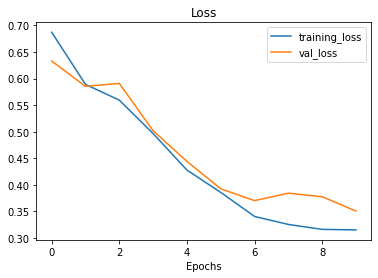

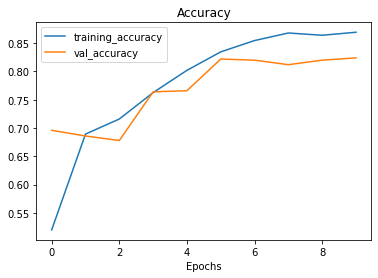

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_5)

The results are getting even better with more filters and epochs.
Judging from the flow of val_acc and val_loss, as it is heading to the right direction, we can try increasing the filters and epochs even more.

# ***Model 6***

Now we will increase even more filters(with each layer reducing by half) and increase the number of epochs to 30.

In [ ]:
# Create the model
model_6 = Sequential([
  Conv2D(200, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(), 
  Conv2D(100, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(50, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=30,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/30
47/47 [==============================] - 38s 721ms/step - loss: 0.6840 - accuracy: 0.5540 - val_loss: 0.6168 - val_accuracy: 0.6860
Epoch 2/30
47/47 [==============================] - 30s 626ms/step - loss: 0.6097 - accuracy: 0.6727 - val_loss: 0.5784 - val_accuracy: 0.6860
Epoch 3/30
47/47 [==============================] - 30s 643ms/step - loss: 0.5581 - accuracy: 0.7100 - val_loss: 0.5232 - val_accuracy: 0.7120
Epoch 4/30
47/47 [==============================] - 30s 629ms/step - loss: 0.5115 - accuracy: 0.7533 - val_loss: 0.5470 - val_accuracy: 0.7300
Epoch 5/30
47/47 [==============================] - 30s 624ms/step - loss: 0.4722 - accuracy: 0.7827 - val_loss: 0.4517 - val_accuracy: 0.7580
Epoch 6/30
47/47 [==============================] - 31s 659ms/step - loss: 0.4180 - accuracy: 0.8113 - val_loss: 0.4354 - val_accuracy: 0.7880
Epoch 7/30
47/47 [==============================] - 30s 622ms/step - loss: 0.3727 - accuracy: 0.8320 - val_loss: 0.4691 - val_accuracy: 0.7880

In [ ]:
model_6.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 222, 222, 200)     5600      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 111, 111, 200)    0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 109, 109, 100)     180100    
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 54, 54, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 52, 52, 50)        45050     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 26, 26, 50)     

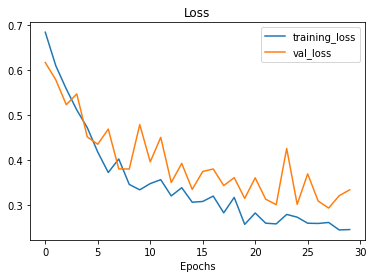

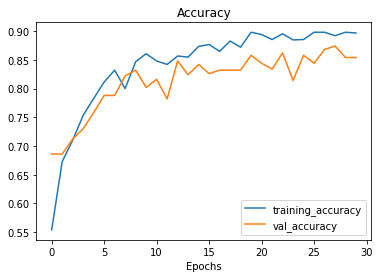

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

This is the best result we get so far with a val_accuracy score of 85%.
Hence we will use this to predict our custom images.

# **Making a prediction based on custom images**

In [ ]:
# Classes we're working with
print(class_names)

['laksa' 'satay']


--2022-02-02 09:47:24--  https://github.com/DSstore/AIP/raw/main/laksa_soup.jpg
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DSstore/AIP/main/laksa_soup.jpg [following]
--2022-02-02 09:47:24--  https://raw.githubusercontent.com/DSstore/AIP/main/laksa_soup.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 464007 (453K) [image/jpeg]
Saving to: ‘laksa_soup.jpg.1’

laksa_soup.jpg.1    100%[===================>] 453.13K  --.-KB/s    in 0.01s   

2022-02-02 09:47:24 (30.0 MB/s) - ‘laksa_soup.jpg.1’ saved [464007/464007]



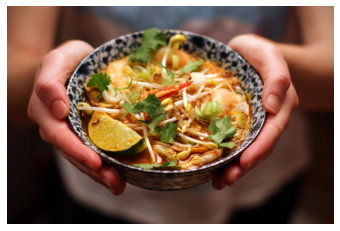

In [ ]:
# View our example image
!wget https://github.com/DSstore/AIP/raw/main/laksa_soup.jpg 
laksa = mpimg.imread("laksa_soup.jpg")
plt.imshow(laksa)
plt.axis(False);

In [ ]:
laksa.shape

(1728, 2592, 3)

So our laksa image is 1728 in height and 2592 in width. 
We need to reduce to 224 by 224 to fit into our model

Writing a function for reuse purpose

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
laksa = load_and_prep_image("laksa_soup.jpg")
laksa

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.47462985, 0.27462983, 0.19787915],
        [0.5018007 , 0.29003602, 0.19591837],
        [0.5140056 , 0.3022409 , 0.20812324],
        ...,
        [0.6666667 , 0.4916363 , 0.39976063],
        [0.65918356, 0.48663455, 0.3807522 ],
        [0.64705884, 0.4745098 , 0.3764706 ]],

       [[0.4785114 , 0.2785114 , 0.19615847],
        [0.49411765, 0.29411766, 0.21176471],
        [0.5043217 , 0.3043217 , 0.2219688 ],
        ...,
        [0.6704282 , 0.49787918, 0.39927974],
        [0.6627451 , 0.49331746, 0.37022784],
        [0.6499393 , 0.47739035, 0.37094775]],

       [[0.49019608, 0.28627452, 0.20280112],
        [0.512605  , 0.29691875, 0.21836735],
        [0.52585036, 0.31016406, 0.23173268],
        ...,
        [0.6779513 , 0.49755913, 0.4034415 ],
        [0.6707485 , 0.4903563 , 0.39623865],
        [0.654902  , 0.48235294, 0.38431373]],

       ...,

       [[0.03137255, 0.01960784, 0.        ],
        [0.03

Our image is load into 224 by 224 now.

However our model's prediction needs (1, 244, 244, 3) instead.

In [ ]:
# Add an extra axis
print(f"Shape before new dimension: {laksa.shape}")
laksa = tf.expand_dims(laksa, axis=0) # add an extra dimension at axis 0
print(f"Shape after new dimension: {laksa.shape}")
laksa

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.47462985, 0.27462983, 0.19787915],
         [0.5018007 , 0.29003602, 0.19591837],
         [0.5140056 , 0.3022409 , 0.20812324],
         ...,
         [0.6666667 , 0.4916363 , 0.39976063],
         [0.65918356, 0.48663455, 0.3807522 ],
         [0.64705884, 0.4745098 , 0.3764706 ]],

        [[0.4785114 , 0.2785114 , 0.19615847],
         [0.49411765, 0.29411766, 0.21176471],
         [0.5043217 , 0.3043217 , 0.2219688 ],
         ...,
         [0.6704282 , 0.49787918, 0.39927974],
         [0.6627451 , 0.49331746, 0.37022784],
         [0.6499393 , 0.47739035, 0.37094775]],

        [[0.49019608, 0.28627452, 0.20280112],
         [0.512605  , 0.29691875, 0.21836735],
         [0.52585036, 0.31016406, 0.23173268],
         ...,
         [0.6779513 , 0.49755913, 0.4034415 ],
         [0.6707485 , 0.4903563 , 0.39623865],
         [0.654902  , 0.48235294, 0.38431373]],

        ...,

        [[0.03137255, 0.01960784, 

In [ ]:
# Make a prediction on custom image tensor
pred = model_6.predict(laksa)
pred

array([[0.02631071]], dtype=float32)

In [ ]:
#Confirm that [0] is laksa, and [1] is satay
class_names[0] , class_names[1]

('laksa', 'satay')

In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred))]
pred_class

'laksa'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

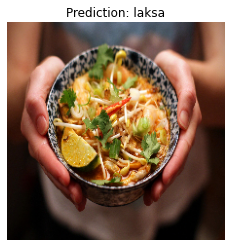

In [ ]:
# Test our model on a custom image
pred_and_plot(model_6, "laksa_soup.jpg", class_names)

Our image prediction is working as intended

--2022-02-02 09:48:52--  https://github.com/DSstore/AIP/raw/main/satay.jpg
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DSstore/AIP/main/satay.jpg [following]
--2022-02-02 09:48:52--  https://raw.githubusercontent.com/DSstore/AIP/main/satay.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153856 (150K) [image/jpeg]
Saving to: ‘satay.jpg.2’

satay.jpg.2         100%[===================>] 150.25K  --.-KB/s    in 0.01s   

2022-02-02 09:48:52 (15.3 MB/s) - ‘satay.jpg.2’ saved [153856/153856]



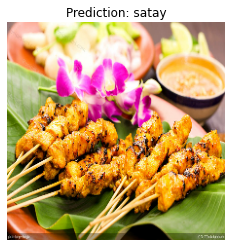

In [ ]:
# Download another test image and make a prediction on it
!wget https://github.com/DSstore/AIP/raw/main/satay.jpg 
pred_and_plot(model_6, "satay.jpg", class_names)

Hence, we are comfortable with Milestone 2 of achieving binary classification with a prediction accuracy of over 85%.

Moving on to Milestone 3.

In [ ]:
model_6.save('Binary_CNN_model.h5')